----
<img src="../../files/refinitiv.png" width="20%" style="vertical-align: top;">

# Data Library for Python

----

## Access layer - Search templates examples - Equity Search

This notebook illustrates the Search Template functionality of the Refinitiv Data Library. The "Equity" template shown here are template examples that you can modify and adapt to your needs. They are defined in the "search-templates.config.json" configuration file. Below is a brief description of the parameters you can use for each template definition.

**Search templates are defined using the following JSON structure:**

- **description** (string): Description of the template.
- **parameters** (object): Parameters of the template. These parameters can be used as placeholders in the request_body of the template and as named parameters of the search() method of the template. Each parameter has a name, a description, and an optional default value.
- **request_body** (object): Body of the request sent to the Search REST API. This request body can include template parameters surrounded by '#{' and '}' (for example:  “#{my_param}”). More details on the structure of the request body can be found in the [Search API reference guide](https://apidocs.refinitiv.com/Apps/ApiDocs#/details/L2Rpc2NvdmVyeS9zZWFyY2gvdjE=/Lw==/POST/README) (access to this guide requires a Refinitiv Workspace account or RDP account to log in).
  
**Template example:**
  
```json
"MyTemplate": {
    "description": "Search template example.",
    "parameters": {
        "name": {
            "description": "Name of the person to search for.",
            "default": "Edison"
        }
    },
    "request_body": {
       "Query": "#{name}",
       "View":"People",
       "Top":10
    }
} 
```  

**Example of usage:**

```  
rd.discovery.search_templates["MyTemplate"].search(name="Pasteur")
```  
  

#### Learn more

To learn more about the Refinitiv Data Library for Python please join the Refinitiv Developer Community. By [registering](https://developers.refinitiv.com/iam/register) and [logging](https://developers.refinitiv.com/content/devportal/en_us/initCookie.html) into the Refinitiv Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
the [Refinitiv Data Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The Refinitiv Developer Community will be happy to help. 

----

## Set the configuration file location
For a better ease of use, you have the option to set initialization parameters of the Refinitiv Data Library in the _refinitiv-data.config.json_ configuration file. This file must be located beside your notebook, in your user folder or in a folder defined by the _RD_LIB_CONFIG_PATH_ environment variable. The _RD_LIB_CONFIG_PATH_ environment variable is the option used by this series of examples. The following code sets this environment variable.      

In [1]:
import os
os.environ["RD_LIB_CONFIG_PATH"] = "../../Configuration"

## Some Imports to start with

In [2]:
import refinitiv.data as rd
import cufflinks

## Open the data session

The open_session() function creates and open sessions based on the information contained in the refinitiv-data.config.json configuration file. Please edit this file to set the session type and other parameters required for the session you want to open.

In [3]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x7feabd88bdc0 {name='workspace'}>

## Load the search templates configuration file

In [4]:
rd.load_config("search-templates.config.json")

<ConfigurationSet: 0x7feab865adf0>

## Equities Search Template example

### Access the template

In [5]:
equity = rd.discovery.search_templates['Equity']

### Get help about this template

In [6]:
help(equity)

Help on DiscoverySearchTemplate in module refinitiv.data.discovery._search_templates.search:

<DiscoverySearchTemplate 'Equity'>
    Search for Ordinary Shares of a particular exchange.
    
    Methods
    -------
    search
        exchange_name
            Name of the exchange where this equity is traded. For example: 'London Stock Exchange', 'Euronext Paris', 'Shanghai Stock Exchange', 'The Toronto Stock Exchange', 'NYSE Consolidated', etc.
    
        what
            What to search for
            default: ''



### Search for Equities of the New York Stock Exchange Consolidated

In [7]:
nyse_equities = equity.search(exchange_name='NYSE Consolidated')
display(nyse_equities)

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,SearchAllCategory,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CUSIP,CinCUSIP,SolvencyMargin
0,Berkshire Hathaway Inc,NYSE Consolidated,BRKa,693513590760,506199000000,<NA>,0.462934,0.896323,-1189.17575,Financials/Diversified Financials/Diversified ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,727363,US0846701086,084670108,<NA>,<NA>
1,Walt Disney Co,NYSE Consolidated,DIS,167733991056,88553000000,52.619234,0.49794,1.239782,1.74803,Communication Services/Media & Entertainment/E...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,1096946,US2546871060,254687106,<NA>,<NA>
2,Exxon Mobil Corp,NYSE Consolidated,XOM,439884760000,168577000000,8.711722,0.481643,1.122766,12.26164,"Energy/Energy/Oil, Gas & Consumable Fuels/Inte...",...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,728548,US30231G1022,30231G102,<NA>,<NA>
3,UnitedHealth Group Inc,NYSE Consolidated,UNH,471379107328,71760000000,24.711943,0.6396,0.693955,20.41523,Health Care/Health Care Equipment & Services/H...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,1096631,US91324P1021,91324P102,<NA>,24.05608
4,JPMorgan Chase & Co,NYSE Consolidated,JPM,400030482625,259289000000,11.515216,0.921431,1.133849,11.84346,Financials/Banks/Banks/Diversified Banks,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,1113813,US46625H1005,46625H100,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,Test Zxz,NYSE Consolidated,ZXZ,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,214389816,<NA>,<NA>,<NA>,<NA>
1935,NYSE Tick Pilot Test Sym G1,NYSE Consolidated,NTESTa.K,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,237876615,<NA>,<NA>,<NA>,<NA>
1936,NYSE Tick Pilot Test Sym-G2,NYSE Consolidated,NTESTb.K,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,237876637,<NA>,<NA>,<NA>,<NA>
1937,NYSE Tick Pilot Test Sym G2,NYSE Consolidated,NTESTc.K,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,237876655,<NA>,<NA>,<NA>,<NA>


### Experiment with the returned DataFrame 

#### Define a function to plot and display data

In [8]:
def plot_and_display(df, column_name):
    df = df.sort_values(column_name,ascending = False)
    df[['DTSubjectName', column_name]].iplot(x='DTSubjectName')
    display(df)

#### Get the Equities by Market Cap

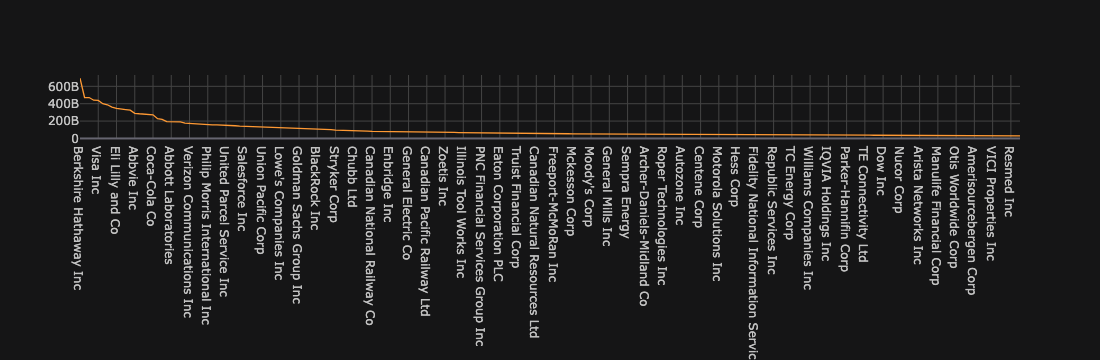

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,SearchAllCategory,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CUSIP,CinCUSIP,SolvencyMargin
0,Berkshire Hathaway Inc,NYSE Consolidated,BRKa,693513590760,506199000000,<NA>,0.462934,0.896323,-1189.17575,Financials/Diversified Financials/Diversified ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,727363,US0846701086,084670108,<NA>,<NA>
1796,Berkshire Hathaway Inc,NYSE Consolidated,BRKb,693513590760,506199000000,<NA>,0.462934,0.891957,-0.8,Financials/Diversified Financials/Diversified ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,727365,US0846707026,084670702,<NA>,<NA>
3,UnitedHealth Group Inc,NYSE Consolidated,UNH,471379107328,71760000000,24.711943,0.6396,0.693955,20.41523,Health Care/Health Care Equipment & Services/H...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,1096631,US91324P1021,91324P102,<NA>,24.05608
10,Johnson & Johnson,NYSE Consolidated,JNJ,470946932128,74023000000,25.077755,0.59332,0.560998,7.18286,"Health Care/Pharmaceuticals, Biotechnology & L...",...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,1097390,US4781601046,478160104,<NA>,<NA>
2,Exxon Mobil Corp,NYSE Consolidated,XOM,439884760000,168577000000,8.711722,0.481643,1.122766,12.26164,"Energy/Energy/Oil, Gas & Consumable Fuels/Inte...",...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,728548,US30231G1022,30231G102,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Brown-Forman Corp,NYSE Consolidated,BFb,31403785144,2737000000,35.531481,0.570532,0.687191,1.84428,"Consumer Staples/Food, Beverage & Tobacco/Beve...",...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,725177,US1156372096,115637209,<NA>,<NA>
264,Public Service Enterprise Group Inc,NYSE Consolidated,PEG,31189348497,14438000000,45.662734,0.705341,0.595018,1.36895,Utilities/Utilities/Multi-Utilities/Multi-Util...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,724638,US7445731067,744573106,<NA>,<NA>
250,Resmed Inc,NYSE Consolidated,RMD,30893401785,3360751000,39.442752,0.340493,0.462311,5.34699,Health Care/Health Care Equipment & Services/H...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,726786,US7611521078,761152107,<NA>,<NA>
306,PPG Industries Inc,NYSE Consolidated,PPG,30546510398,6286000000,29.22467,0.699733,1.194683,4.44727,Materials/Materials/Chemicals/Specialty Chemicals,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,724680,US6935061076,693506107,<NA>,<NA>


In [9]:
equities = nyse_equities.query("MktCapCompanyUsd >= 30_000_000_000")
plot_and_display(equities, "MktCapCompanyUsd")

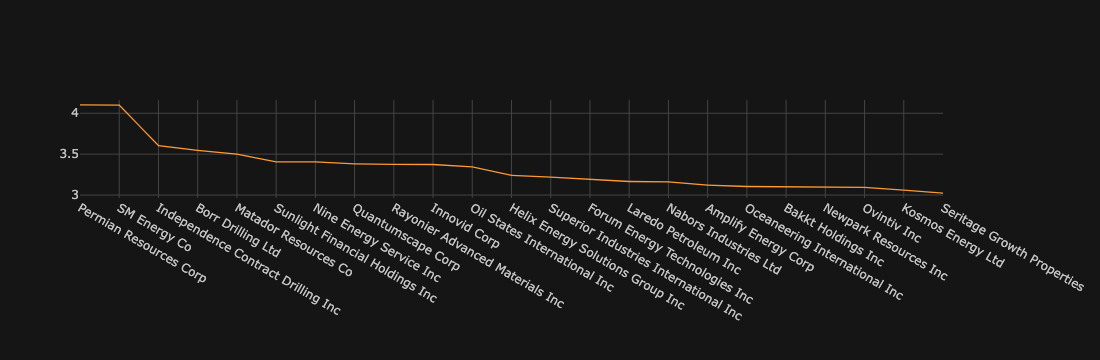

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,SearchAllCategory,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CUSIP,CinCUSIP,SolvencyMargin
507,Permian Resources Corp,NYSE Consolidated,PR,4824974662,2750720000,4.730654,0.277,4.102281,1.8285,"Energy/Energy/Oil, Gas & Consumable Fuels/Oil ...",...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,223957549,US71424F1057,71424F105,<NA>,<NA>
476,SM Energy Co,NYSE Consolidated,SM,3688793221,2063131000,3.034469,0.60582,4.099876,9.89959,"Energy/Energy/Oil, Gas & Consumable Fuels/Oil ...",...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,10189842,US78454L1008,78454L100,<NA>,<NA>
1589,Independence Contract Drilling Inc,NYSE Consolidated,ICD,41123355,195229000,<NA>,0.508368,3.603619,-9.16037,Energy/Energy/Energy Equipment & Services/Oil ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,163898233,US4534156066,453415606,<NA>,<NA>
1883,Borr Drilling Ltd,NYSE Consolidated,BORR.K,1079716528,889900000,<NA>,0.7111,3.546276,-2.0769,Energy/Energy/Energy Equipment & Services/Oil ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,305320672,BMG1466R1732,<NA>,G1466R173,<NA>
463,Matador Resources Co,NYSE Consolidated,MTDR.K,6354726545,1907210000,5.48883,0.500865,3.501395,9.79808,"Energy/Energy/Oil, Gas & Consumable Fuels/Oil ...",...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,91596806,US5764852050,576485205,<NA>,<NA>
1346,Sunlight Financial Holdings Inc,NYSE Consolidated,SUNL.K,160354820,562818000,<NA>,0.123008,3.406618,-5.04392,Financials/Diversified Financials/Consumer Fin...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,487508575,US86738J1060,86738J106,<NA>,<NA>
772,Nine Energy Service Inc,NYSE Consolidated,NINE.K,400980680,-39267000,<NA>,1.102897,3.404719,-0.32771,Energy/Energy/Energy Equipment & Services/Oil ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,269524295,US65441V1017,65441V101,<NA>,<NA>
627,Quantumscape Corp,NYSE Consolidated,QS,2423922854,1606895000,<NA>,0.062402,3.381766,-0.85948,Consumer Discretionary/Automobiles & Component...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,452653999,US74767V1098,74767V109,<NA>,<NA>
1206,Rayonier Advanced Materials Inc,NYSE Consolidated,RYAM.K,614762905,814343000,<NA>,0.666939,3.374165,-0.93897,Materials/Materials/Chemicals/Specialty Chemicals,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,160720930,US75508B1044,75508B104,<NA>,<NA>
1528,Innovid Corp,NYSE Consolidated,CTV,203148880,161255000,<NA>,0.215426,3.373576,-0.38396,Communication Services/Media & Entertainment/M...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,505191096,US4576791085,457679108,<NA>,<NA>


In [10]:
equities = nyse_equities.query("Beta >= 3")
plot_and_display(equities, "Beta")

#### Get the Equities by Share Holders Equity

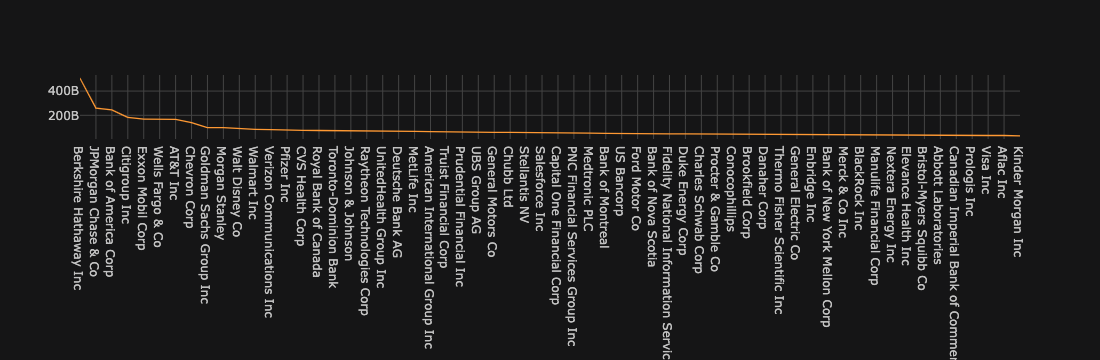

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,SearchAllCategory,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CUSIP,CinCUSIP,SolvencyMargin
0,Berkshire Hathaway Inc,NYSE Consolidated,BRKa,693513590760,506199000000,<NA>,0.462934,0.896323,-1189.17575,Financials/Diversified Financials/Diversified ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,727363,US0846701086,084670108,<NA>,<NA>
1796,Berkshire Hathaway Inc,NYSE Consolidated,BRKb,693513590760,506199000000,<NA>,0.462934,0.891957,-0.8,Financials/Diversified Financials/Diversified ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,727365,US0846707026,084670702,<NA>,<NA>
4,JPMorgan Chase & Co,NYSE Consolidated,JPM,400030482625,259289000000,11.515216,0.921431,1.133849,11.84346,Financials/Banks/Banks/Diversified Banks,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,1113813,US46625H1005,46625H100,<NA>,<NA>
8,Bank of America Corp,NYSE Consolidated,BAC,273885836639,245358000000,10.816017,0.914792,1.42705,3.15643,Financials/Banks/Banks/Diversified Banks,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,728529,US0605051046,060505104,<NA>,<NA>
15,Citigroup Inc,NYSE Consolidated,C,90954610493,182977000000,6.330462,0.911552,1.606259,7.4181,Financials/Banks/Banks/Diversified Banks,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,727057,US1729674242,172967424,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,Canadian Imperial Bank of Commerce,NYSE Consolidated,CM,37635873339,33584149599,8.460167,0.946606,1.081751,6.685275,Financials/Banks/Banks/Diversified Banks,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,728714,CA1360691010,136069101,<NA>,<NA>
92,Prologis Inc,NYSE Consolidated,PLD,107963270365,33362925000,21.664314,0.354682,0.976277,5.39874,Real Estate/Real Estate/Equity Real Estate Inv...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,728942,US74340W1036,74340W103,<NA>,<NA>
11,Visa Inc,NYSE Consolidated,V,438335389155,33257001000,30.416309,0.583853,0.927027,6.99,Information Technology/Software & Services/IT ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,42290789,US92826C8394,92826C839,<NA>,<NA>
175,Aflac Inc,NYSE Consolidated,AFL,44719033235,33253000000,9.181878,0.788926,0.930207,7.83282,Financials/Insurance/Insurance/Life & Health I...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,1096564,US0010551028,001055102,<NA>,187.463524


In [11]:
equities = nyse_equities.query("ShareholdersEquityUsd >= 30_000_000_000")
plot_and_display(equities, "ShareholdersEquityUsd")

#### Get Equities by PE

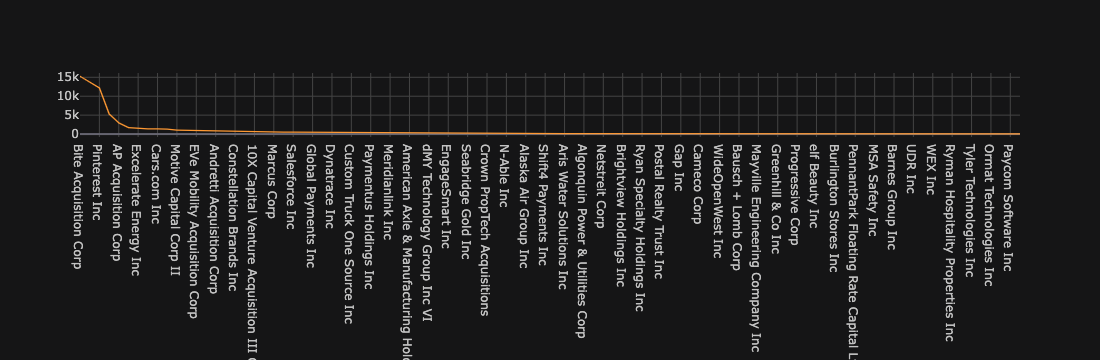

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,SearchAllCategory,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CUSIP,CinCUSIP,SolvencyMargin
1617,Bite Acquisition Corp,NYSE Consolidated,BITE.K,258707600,199858900,15287.878788,0.003253,0.017674,0.00066,<NA>,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,505192748,US09175K1051,09175K105,<NA>,<NA>
1687,ShoulderUP Technology Acquisition Corp,NYSE Consolidated,SUAC.K,428450000,295674970,13666.666667,0.037916,<NA>,0.00075,<NA>,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,574895596,US82537G1040,82537G104,<NA>,<NA>
113,Pinterest Inc,NYSE Consolidated,PINS.K,16128330778,3038743000,12194.871795,0.140928,0.943503,0.00195,Communication Services/Media & Entertainment/I...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,357509714,US72352L1061,72352L106,<NA>,<NA>
1085,Global Net Lease Inc,NYSE Consolidated,GNL,1360757222,1620607000,5351.020408,0.611128,1.261984,0.00245,Real Estate/Real Estate/Equity Real Estate Inv...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,192602150,US3793782018,379378201,<NA>,<NA>
1758,AP Acquisition Corp,NYSE Consolidated,APCA.K,223387500,172638670,2960.0,0.035847,<NA>,0.0035,<NA>,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,581981758,KYG040581061,<NA>,G04058106,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,Alta Equipment Group Inc,NYSE Consolidated,ALTG.K,458124077,134700000,72.336316,0.862915,1.699107,0.19672,Industrials/Capital Goods/Trading Companies & ...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,361993873,US02128L1061,02128L106,<NA>,<NA>
770,Ormat Technologies Inc,NYSE Consolidated,ORA,4759051388,1854999000,71.809748,0.546332,0.478555,1.18243,Utilities/Utilities/Independent Power and Rene...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,18634332,US6866881021,686688102,<NA>,<NA>
1671,Westwood Holdings Group Inc,NYSE Consolidated,WHG,98350576,117906000,71.467873,0.155431,1.230869,0.16357,Financials/Diversified Financials/Capital Mark...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,7929251,US9617651040,961765104,<NA>,<NA>
289,Paycom Software Inc,NYSE Consolidated,PAYC.K,17585618713,893714000,70.638606,0.72203,1.362345,4.30218,Information Technology/Software & Services/Sof...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,156409257,US70432V1026,70432V102,<NA>,<NA>


In [12]:
equities = nyse_equities.query("Pe >= 70")
plot_and_display(equities, "Pe")

#### Get Equities by Debt Ratio

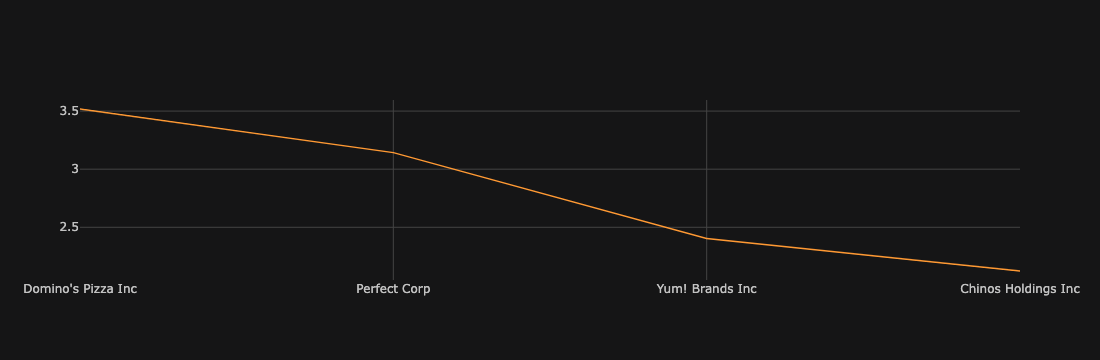

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,SearchAllCategory,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CUSIP,CinCUSIP,SolvencyMargin
216,Domino's Pizza Inc,NYSE Consolidated,DPZ,12191192133,-4209536000,27.903611,3.517942,0.747829,12.34213,Consumer Discretionary/Consumer Services/Hotel...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,17480310,US25754A2015,25754A201,<NA>,<NA>
1720,Perfect Corp,NYSE Consolidated,PERF.K,864508341,-190442000,22.739999,3.142108,-0.201858,0.32146,Information Technology/Software & Services/Sof...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,497816921,KYG7006A1094,<NA>,G7006A109,<NA>
165,Yum! Brands Inc,NYSE Consolidated,YUM,36247594596,-8373000000,29.313809,2.403453,0.990615,4.38974,Consumer Discretionary/Consumer Services/Hotel...,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,728177,US9884981013,988498101,<NA>,<NA>
1765,Chinos Holdings Inc,NYSE Consolidated,CHIHO.K,<NA>,-1569749000,<NA>,2.123781,<NA>,<NA>,<NA>,...,Equities,A:1L,US Dollar,AC,QUOTExEQUITY,439963932,<NA>,<NA>,<NA>,<NA>


In [13]:
equities = nyse_equities.query("DebtToAssets >= 2")
plot_and_display(equities, "DebtToAssets")

### Get Vodafone related equities and use get_data() to retrieve additional information 

In [14]:
vod_equities = equity.search(what="vodafone")
rd.get_data(
    universe=vod_equities['RIC'].to_list(),
    fields=['TR.RevenueSmartEst.date', 'TR.RevenueSmartEst', 'TR.NetprofitSmartEst', 'TR.EpsSmartEst']
)

,Instrument,Date,Revenue - SmartEstimate®,Net Income - SmartEstimate®,Earnings Per Share - SmartEstimate®
0,VOD.L,2023-01-04,45912254370,3012292230,0.10508
1,VODA.NS,2023-01-02,426431254480,-285111247260,-8.93096
2,IPO-VOD.NZ,NaT,<NA>,<NA>,<NA>
3,SYN.IC,NaT,<NA>,<NA>,<NA>
4,VFQS.QA,2022-12-21,2976909840,453932380,0.10543
...,...,...,...,...,...
77,VODl.TWEA,2023-01-04,45912254370,3012292230,0.10508
78,SYNr.BCO,NaT,<NA>,<NA>,<NA>
79,VODl.TRXA,2023-01-04,45912254370,3012292230,0.10508
80,AU0000090128.TWEA,2023-01-04,5345513460,294331200,0.16103


## Close the session

In [15]:
rd.close_session()